## Soluzione Esercitazione di Potenziamento 26 Maggio 2023

Implementare le function necessarie per costruire il polinomio interpolante di Lagrange. 

                                                         [5 punti]
                                                         
                                                         

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def plagr(xnodi,k):
    """
    Restituisce i coefficienti del k-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if k==0:
       xzeri=xnodi[1:n]
    else:
       xzeri=np.append(xnodi[0:k],xnodi[k+1:n])
    
    num=np.poly(xzeri) 
    den=np.polyval(num,xnodi[k])
    
    p=num/den
    
    return p



def InterpL(x, f, xx):
     """"
        %funzione che determina in un insieme di punti il valore del polinomio
        %interpolante ottenuto dalla formula di Lagrange.
        % DATI INPUT
        %  x  vettore con i nodi dell'interpolazione
        %  f  vettore con i valori dei nodi 
        %  xx vettore con i punti in cui si vuole calcolare il polinomio
        % DATI OUTPUT
        %  y vettore contenente i valori assunti dal polinomio interpolante
        %
     """
     n=x.size
     m=xx.size
     L=np.zeros((m,n))
     for k in range(n):
        p=plagr(x,k)
        L[:,k]=np.polyval(p,xx)
    
    
     return np.dot(L,f)

Sia assegnata la funzione $f(x)=cos(\pi x)+sin(\pi x)$, $ x \in [0,2]$
 

facendo uso delle functions implementate precedentemente, si determini il polinomio p che interpola f nei nodi  x0 = 1, x1 = 1.5, x2 = 1.75.

                                                         [3 punti]

In [17]:
x=np.array([1,1.5,1.75])
f = lambda x: np.cos(np.pi*x)+np.sin(np.pi*x)
y=f(x)
xx=np.linspace(0,2,200)
polL=InterpL(x,y,xx)

si rappresenti in uno stesso grafico la funzione f, il polinomio p e i punti di interpolazione assegnati;

                                                         [2 punti]

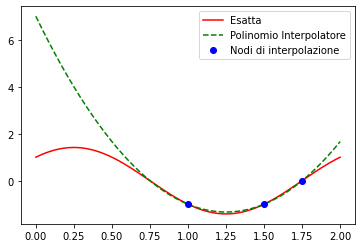

In [18]:
plt.plot(xx,f(xx),'r-',xx,polL,'g--',x,y,'bo')
plt.legend(['Esatta ','Polinomio Interpolatore','Nodi di interpolazione'])

 si calcoli il valore assunto dalla funzione errore E(x) := |f(x) − p(x)| nel punto $x^∗$ = 0.75 e si definisca teoricamente da cosa dipende l'errore che si compie quando al posto del polinomio interpolatore si considera la funzione che ha generato i dati, commentando opportunamente la formula
 
                                                             [3 punti]

errore  [2.22044605e-16]


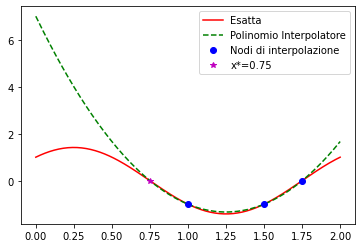

In [19]:
val075=InterpL(x,y,np.array([0.75]))
errore=np.abs(f(0.75)-val075)
print("errore ",errore)
plt.plot(xx,f(xx),'r-',xx,polL,'g--',x,y,'bo',0.75,val075,'m*')
plt.legend(['Esatta ','Polinomio Interpolatore','Nodi di interpolazione','x*=0.75'])

si stabilisca qual è il polinomio interpolatore per f passante per i nodi $x^*$ 
, x0, x1 e x2.

                                                          [2 punti]

Poichè l'errore in x* è dell'ordine della precisione di macchina, possiamo concludere, senza fare il calcolo, che il polinomio che abbiamo determinato al punto precedente interpola x*,x0,x1,x2 , in quanto in x* assume lo stesso valore della funzione f che ha generato i dati (infatti err(x*)=abs(f(x*)-pol(x*))=0 ci fa concludere che il polinomio interpola anche x* . 
Di seguito calcoliamo, per verifica, il polinomio che interpola x*,x0,x1,x2

[]

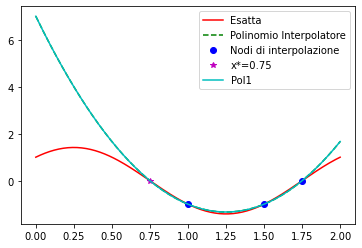

In [20]:
x1=np.array([0.75,1,1.5,1.75])
y1=f(x1)
polL1=InterpL(x1,y1,xx)
plt.plot(xx,f(xx),'r-',xx,polL,'g--',x,y,'bo',0.75,val075,'m*',xx,polL1,'c')
plt.legend(['Esatta ','Polinomio Interpolatore','Nodi di interpolazione','x*=0.75','Pol1'])
plt.plot()

Si calcoli la costante di Lebesgue e si dica che ruolo svolge nell'ambito dell'interpolazione polinomiale

                                                   [3 punti]

In [21]:
x=np.array([1,1.5,1.75])
xx=np.linspace(0,2,200)
n=2  #grado polinomio interpolante
#Calcolo della costante di Lebesgue: Rappresenta l'indice di condizionamento del
#problema dell'interpolazione polinomiale. Vedi dispense Interpolazione polinomiale
#per la formula e per il suo significato
Ls=np.zeros((200,1));
for j in range (n+1):        
    pL=plagr(x,j);
    Ls=Ls+np.abs(np.polyval(pL,xx))
    
cL=np.max(Ls)
print(cL)

29.0


La costante di Lebesgue può essere ottenuta equivalentemente  facendo la somma dei valori assoluti della matrice L1 (in cui la colonna j-esima è il j-esimo polinomio base di Lagrange) e quindi calcolando il massimo di questo vettore

In [22]:
L1=np.zeros((200,n+1));
for j in range (n+1):        
    pL=plagr(x,j);
    L1[:,j]=np.polyval(pL,xx)

Ls1= np.sum(abs(L1),axis=0)
    
cL1=np.max(Ls1)
print(cL)

29.0
